In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import average_precision_score
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import f1_score
from sklearn.metrics import confusion_matrix
from sklearn.tree import DecisionTreeClassifier
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from sklearn.neighbors import KNeighborsClassifier

/Users/lanaal-dabbas/opt/anaconda3/lib/python3.9/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.26.4
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [2]:
df=pd.read_csv("diabetes.csv")
df
df2=df
df2

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


# Replacing zero with median

In [3]:
df[['Glucose','BloodPressure','SkinThickness','Insulin','BMI']]=df[['Glucose'
,'BloodPressure','SkinThickness','Insulin','BMI']].replace(0,np.NaN)

In [4]:
# Calculate medians for each attribute based on Outcome
medians = df.groupby("Outcome")[['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']].median()

# Fill missing values based on Outcome
for outcome in [0, 1]:
    mask = (df["Outcome"] == outcome)
    df.loc[mask, ['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']] = df.loc[mask, ['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']].fillna(medians.loc[outcome])

In [5]:
x=df.drop(columns=['Outcome'])
y=df['Outcome']

In [6]:
scaler=MinMaxScaler()
x=scaler.fit_transform(x)

In [7]:
# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [8]:
random_forest = RandomForestClassifier(n_estimators=100, random_state=42)
random_forest.fit(X_train, y_train)
y_pred = random_forest.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.92      0.89      0.90        99
           1       0.81      0.85      0.83        55

    accuracy                           0.88       154
   macro avg       0.86      0.87      0.87       154
weighted avg       0.88      0.88      0.88       154



In [9]:
knn=KNeighborsClassifier(n_neighbors=2)
knn.fit(X_train,y_train)

KNeighborsClassifier(n_neighbors=2)

In [10]:
y_pred = knn.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)


print("Accuracy:", accuracy)

Accuracy: 0.7402597402597403


In [11]:
# transform the dataset
oversample = SMOTE()
Xs, ys = oversample.fit_resample(X_train, y_train)

In [12]:
random_forest = RandomForestClassifier(n_estimators=100, random_state=42)
random_forest.fit(Xs, ys)
y_pred = random_forest.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.92      0.86      0.89        99
           1       0.77      0.87      0.82        55

    accuracy                           0.86       154
   macro avg       0.85      0.87      0.86       154
weighted avg       0.87      0.86      0.87       154



In [13]:
# GridSearchCV , RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix, classification_report

X_train_selected, X_test_selected, y_train_selected, y_test_selected = train_test_split(Xs, ys, test_size=0.2, random_state=35)

# Standardize the features
scaler = StandardScaler()
X_train_selected_scaled = scaler.fit_transform(X_train_selected)
X_test_selected_scaled = scaler.transform(X_test_selected)

# Define the parameter grid
param_grid = {
    'n_estimators': [50, 100, 150],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

#Random Forest Classifier
rf_classifier = RandomForestClassifier(random_state=35)

#Grid Search CV
grid_search = GridSearchCV(rf_classifier, param_grid, cv=5, scoring='accuracy')

# Fit model
grid_search.fit(X_train_selected_scaled, y_train_selected)

print("Best Parameters:", grid_search.best_params_)

# predictions
y_pred_tuned_selected = grid_search.best_estimator_.predict(X_test_selected_scaled)

# Evaluate the model performance after tuning
print("\nAfter Hyperparameter Tuning:")
print("Confusion Matrix:")
print(confusion_matrix(y_test_selected, y_pred_tuned_selected))
print("\nClassification Report:")
print(classification_report(y_test_selected, y_pred_tuned_selected))

Best Parameters: {'max_depth': 10, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 150}

After Hyperparameter Tuning:
Confusion Matrix:
[[56 13]
 [ 6 86]]

Classification Report:
              precision    recall  f1-score   support

           0       0.90      0.81      0.85        69
           1       0.87      0.93      0.90        92

    accuracy                           0.88       161
   macro avg       0.89      0.87      0.88       161
weighted avg       0.88      0.88      0.88       161



In [14]:
df.rename(columns={'DiabetesPedigreeFunction': 'DPF'}, inplace=True)

In [15]:
df['Outcome'].replace({'Normal': 0, 'Diabetic': 1}, inplace=True)

In [16]:
df['Outcome'].value_counts()

0    500
1    268
Name: Outcome, dtype: int64

In [17]:
df2

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DPF,Age,Outcome
0,6,148.0,72.0,35.0,169.5,33.6,0.627,50,1
1,1,85.0,66.0,29.0,102.5,26.6,0.351,31,0
2,8,183.0,64.0,32.0,169.5,23.3,0.672,32,1
3,1,89.0,66.0,23.0,94.0,28.1,0.167,21,0
4,0,137.0,40.0,35.0,168.0,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101.0,76.0,48.0,180.0,32.9,0.171,63,0
764,2,122.0,70.0,27.0,102.5,36.8,0.340,27,0
765,5,121.0,72.0,23.0,112.0,26.2,0.245,30,0
766,1,126.0,60.0,32.0,169.5,30.1,0.349,47,1


# Replacing Zeros with Linear regresstion 

In [18]:
# Function to replace zeros in a specific column with predicted values using linear regression
def replace_zeros_with_linear_regression(dataframe, target_column):
    # Split the dataframe into two parts: rows with zeros and rows without zeros
    zero_rows = dataframe[dataframe[target_column] == 0]
    non_zero_rows = dataframe[dataframe[target_column] != 0]

    # Define features and target variable
    features = non_zero_rows.drop(columns=[target_column])
    target = non_zero_rows[target_column]

    # Split the data into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)

    # Initialize and train the linear regression model
    model = LinearRegression()
    model.fit(X_train, y_train)

    # Predict values for the rows with zeros
    zero_rows_features = zero_rows.drop(columns=[target_column])
    predicted_values = model.predict(zero_rows_features)

    # Replace zeros with predicted values in the original dataframe
    dataframe.loc[dataframe[target_column] == 0, target_column] = predicted_values

    return dataframe

In [19]:
#df = replace_zeros_with_linear_regression(df, 'Insulin')

In [20]:
#df2 = replace_zeros_with_linear_regression(df2, 'SkinThickness')

In [21]:
#df2 = replace_zeros_with_linear_regression(df2, 'BloodPressure')

In [22]:
#df2 = replace_zeros_with_linear_regression(df2, 'BMI')

In [23]:
x=df2.drop(columns=['Outcome'])
y=df2['Outcome']

In [24]:
# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [25]:
random_forest = RandomForestClassifier(n_estimators=100, random_state=42)
random_forest.fit(X_train, y_train)
y_pred = random_forest.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.93      0.89      0.91        99
           1       0.81      0.87      0.84        55

    accuracy                           0.88       154
   macro avg       0.87      0.88      0.87       154
weighted avg       0.89      0.88      0.88       154



In [26]:
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")

# Calculate F1-score
f1 = f1_score(y_test, y_pred, average='weighted')
print(f"F1 Score: {f1:.2f}")


Accuracy: 0.88
F1 Score: 0.88


In [27]:
import xgboost as xgb
# Creating XGBoost model
model = xgb.XGBClassifier()
model.fit(X_train, y_train)

# Making predictions on the test set
y_pred = model.predict(X_test)

# Evaluating the accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")


Accuracy: 0.86


# ML without some columns

In [28]:
df1=df
df1=df.drop(columns=['SkinThickness','BloodPressure'])

In [29]:
df1

,Pregnancies,Glucose,Insulin,BMI,DPF,Age,Outcome
0,6,148.0,169.5,33.6,0.627,50,1
1,1,85.0,102.5,26.6,0.351,31,0
2,8,183.0,169.5,23.3,0.672,32,1
3,1,89.0,94.0,28.1,0.167,21,0
4,0,137.0,168.0,43.1,2.288,33,1
...,...,...,...,...,...,...,...
763,10,101.0,180.0,32.9,0.171,63,0
764,2,122.0,102.5,36.8,0.340,27,0
765,5,121.0,112.0,26.2,0.245,30,0
766,1,126.0,169.5,30.1,0.349,47,1


In [30]:
x1=df1.drop(columns=['Outcome'])
y1=df1['Outcome']

In [31]:
# Split the dataset into training and testing sets
X_train_rm, X_test_rm, y_train_rm, y_test_rm = train_test_split(x1, y1, test_size=0.2, random_state=42)

In [32]:
X_train_rm

,Pregnancies,Glucose,Insulin,BMI,DPF,Age
60,2,84.0,102.5,30.1,0.304,21
618,9,112.0,169.5,28.2,1.282,50
346,1,139.0,83.0,28.7,0.654,22
294,0,161.0,102.5,21.9,0.254,65
231,6,134.0,370.0,46.2,0.238,46
...,...,...,...,...,...,...
71,5,139.0,140.0,28.6,0.411,26
106,1,96.0,102.5,22.4,0.207,27
270,10,101.0,169.5,45.6,1.136,38
435,0,141.0,169.5,42.4,0.205,29


In [33]:
random_forest = RandomForestClassifier(n_estimators=100, random_state=42)
random_forest.fit(X_train_rm, y_train_rm)
y_pred = random_forest.predict(X_test_rm)
print(classification_report(y_test_rm, y_pred))

              precision    recall  f1-score   support

           0       0.92      0.88      0.90        99
           1       0.80      0.85      0.82        55

    accuracy                           0.87       154
   macro avg       0.86      0.87      0.86       154
weighted avg       0.87      0.87      0.87       154



In [34]:
accuracy = accuracy_score(y_test_rm, y_pred)
print(f"Accuracy: {accuracy:.2f}")

# Calculate F1-score
f1 = f1_score(y_test_rm, y_pred, average='weighted')
print(f"F1 Score: {f1:.2f}")

Accuracy: 0.87
F1 Score: 0.87


# SMOTE

In [35]:
x2=df.drop(columns=['Outcome'])
y2=df['Outcome']

In [36]:
# Split the dataset into training and testing sets
X_train2, X_test2, y_train2, y_test2 = train_test_split(x2, y2, test_size=0.2, random_state=42)

In [37]:
print("\n\t Pre Oversampling, counts of label '1': {}".format(sum(y_train2 == 1))) 
print("\n\t Pre Oversampling, counts of label '0': {}".format(sum(y_train2 == 0))) 


	 Pre Oversampling, counts of label '1': 213

	 Pre Oversampling, counts of label '0': 401


In [38]:
# transform the dataset
oversample = SMOTE()
Xs, ys = oversample.fit_resample(X_train2, y_train2)

In [39]:
print("\n\t Pre Oversampling, counts of label '1': {}".format(sum(ys == 1))) 
print("\n\t Pre Oversampling, counts of label '0': {}".format(sum(ys == 0))) 


	 Pre Oversampling, counts of label '1': 401

	 Pre Oversampling, counts of label '0': 401


# ML with Balancing 

In [40]:
random_forest = RandomForestClassifier(n_estimators=100, random_state=42)

In [41]:
random_forest.fit(Xs, ys)

RandomForestClassifier(random_state=42)

In [42]:
y_pred = random_forest.predict(X_test2)

In [43]:
# Additional evaluation metrics
print(classification_report(y_test2, y_pred))
#74 without some column balanced
#74 with some column Ubalanced
#76 with some column balanced

              precision    recall  f1-score   support

           0       0.90      0.85      0.88        99
           1       0.75      0.84      0.79        55

    accuracy                           0.84       154
   macro avg       0.83      0.84      0.83       154
weighted avg       0.85      0.84      0.85       154



In [44]:
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")

# Calculate F1-score
f1 = f1_score(y_test, y_pred, average='weighted')
print(f"F1 Score: {f1:.2f}")

Accuracy: 0.84
F1 Score: 0.85


In [45]:
# GridSearchCV , RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix, classification_report

X_train_selected, X_test_selected, y_train_selected, y_test_selected = train_test_split(x, y, test_size=0.2, random_state=35)

# Standardize the features
scaler = StandardScaler()
X_train_selected_scaled = scaler.fit_transform(X_train_selected)
X_test_selected_scaled = scaler.transform(X_test_selected)

# Define the parameter grid
param_grid = {
    'n_estimators': [50, 100, 150],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

#Random Forest Classifier
rf_classifier = RandomForestClassifier(random_state=35)

#Grid Search CV
grid_search = GridSearchCV(rf_classifier, param_grid, cv=5, scoring='accuracy')

# Fit model
grid_search.fit(X_train_selected_scaled, y_train_selected)

print("Best Parameters:", grid_search.best_params_)

# predictions
y_pred_tuned_selected = grid_search.best_estimator_.predict(X_test_selected_scaled)

# Evaluate the model performance after tuning
print("\nAfter Hyperparameter Tuning:")
print("Confusion Matrix:")
print(confusion_matrix(y_test_selected, y_pred_tuned_selected))
print("\nClassification Report:")
print(classification_report(y_test_selected, y_pred_tuned_selected))

Best Parameters: {'max_depth': None, 'min_samples_leaf': 2, 'min_samples_split': 2, 'n_estimators': 150}

After Hyperparameter Tuning:
Confusion Matrix:
[[94  6]
 [ 7 47]]

Classification Report:
              precision    recall  f1-score   support

           0       0.93      0.94      0.94       100
           1       0.89      0.87      0.88        54

    accuracy                           0.92       154
   macro avg       0.91      0.91      0.91       154
weighted avg       0.92      0.92      0.92       154



# CNN

In [46]:
# Standardize the features
scaler = StandardScaler()
X_train_NN = scaler.fit_transform(Xs)
X_test_NN = scaler.transform(X_test)

# Determine input size based on the number of features
input_size = X_train_NN.shape[1]

In [47]:
y_train_NN = ys.astype(int)
y_test_NN = y_test.astype(int)

In [48]:
import tensorflow as tf
from tensorflow.keras import layers, models

# Define the neural network model
model = models.Sequential()

# Input layer
model.add(layers.InputLayer(input_shape=(input_size,)))

# First hidden layer
model.add(layers.Dense(units=256, activation='relu'))

# First hidden layer
model.add(layers.Dense(units=128, activation='relu'))

# First hidden layer
model.add(layers.Dense(units=64, activation='relu'))

# Second hidden layer
model.add(layers.Dense(units=32, activation='relu'))

# Output layer
model.add(layers.Dense(units=1, activation='softmax'))

# Display the model summary
model.summary()


2024-07-20 06:10:23.261373: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
/Users/lanaal-dabbas/opt/anaconda3/lib/python3.9/site-packages/keras/src/layers/core/input_layer.py:25: UserWarning: Argument `input_shape` is deprecated. Use `shape` instead.
  warnings.warn(


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 256)            │         2,304 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 128)            │        32,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 45,569 (178.00 KB)

 Trainable params: 45,569 (178.00 KB)

 Non-trainable params: 0 (0.00 B)

In [49]:
# Compile the model
model.compile(optimizer='adam',  # You can choose other optimizers like 'sgd', 'rmsprop', etc.
              loss='binary_crossentropy',  # Use appropriate loss function for your task
              metrics=['accuracy'])  # Add any metrics you want to track during training

# Now, you can fit the model to your training data
model.fit(X_train_NN, y_train_NN, epochs=60, batch_size=20, validation_split=0.2)

# After training, you can evaluate the model on the test set
test_loss, test_accuracy = model.evaluate(X_test_NN, y_test)

Epoch 1/60
33/33 ━━━━━━━━━━━━━━━━━━━━ 2s 11ms/step - accuracy: 0.3477 - loss: 0.5685 - val_accuracy: 1.0000 - val_loss: 0.5279
Epoch 2/60
33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.3934 - loss: 0.4172 - val_accuracy: 1.0000 - val_loss: 0.5415
Epoch 3/60
33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.3518 - loss: 0.3581 - val_accuracy: 1.0000 - val_loss: 0.3956
Epoch 4/60
33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.3671 - loss: 0.3168 - val_accuracy: 1.0000 - val_loss: 0.3221
Epoch 5/60
33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.3558 - loss: 0.2923 - val_accuracy: 1.0000 - val_loss: 0.3823
Epoch 6/60
33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.3873 - loss: 0.2717 - val_accuracy: 1.0000 - val_loss: 0.3160
Epoch 7/60
33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.3653 - loss: 0.2645 - val_accuracy: 1.0000 - val_loss: 0.3387
Epoch 8/60
33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.3490 - loss: 0.2949 - val_accuracy: 1.0000 - val_loss

Epoch 52/60
33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.3951 - loss: 0.0053 - val_accuracy: 1.0000 - val_loss: 0.0513
Epoch 53/60
33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.3659 - loss: 0.0046 - val_accuracy: 1.0000 - val_loss: 0.1060
Epoch 54/60
33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.3740 - loss: 0.0197 - val_accuracy: 1.0000 - val_loss: 0.0943
Epoch 55/60
33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.3629 - loss: 0.0085 - val_accuracy: 1.0000 - val_loss: 0.0402
Epoch 56/60
33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.3714 - loss: 0.0614 - val_accuracy: 1.0000 - val_loss: 0.0651
Epoch 57/60
33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.3349 - loss: 0.0777 - val_accuracy: 1.0000 - val_loss: 0.1270
Epoch 58/60
33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.3816 - loss: 0.1521 - val_accuracy: 1.0000 - val_loss: 0.4924
Epoch 59/60
33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.3655 - loss: 0.1462 - val_accuracy: 1.0000 - v

# K-fold

In [50]:
from sklearn.model_selection import KFold
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from imblearn.over_sampling import SMOTE
import numpy as np

# Number of folds (k)
k = 20

# Create KFold object
kf = KFold(n_splits=k, shuffle=True, random_state=42)

# Initialize your model
model = RandomForestClassifier(n_estimators=100, random_state=42)
smote = SMOTE(random_state=42)

# Store accuracy scores for each fold
accuracy_scores = []

# Iterate through each fold
for train_index, test_index in kf.split(x):
    X_train, X_test = x.iloc[train_index], x.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]
    
    # Apply SMOTE to the training set only
    X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)
    
    model.fit(X_train_resampled, y_train_resampled)

    # Make predictions on the test data
    predictions = model.predict(X_test)

    # Evaluate the model's performance (e.g., accuracy)
    accuracy = accuracy_score(y_test, predictions)
    accuracy_scores.append(accuracy)

# Print average accuracy across all folds
average_accuracy = np.mean(accuracy_scores)
print(f'Average Accuracy: {average_accuracy}')

Average Accuracy: 0.888090418353576


# Visulization

In [51]:
df_temp = df.copy()
df_temp['Outcome'] = df_temp['Outcome'].map({0:'Normal', 1:'Diabetic'})
df_temp=df_temp.drop(columns='DPF')

In [52]:
# We'll check mean values of the dependent variables for diabetics and non-diabetics
df_temp.groupby('Outcome').mean()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,Age
Outcome,,,,,,,
Diabetic,4.865672,142.302239,75.272388,32.671642,187.615672,35.398507,37.067164
Normal,3.298000,110.622000,70.844000,27.170000,117.172000,30.846000,31.190000


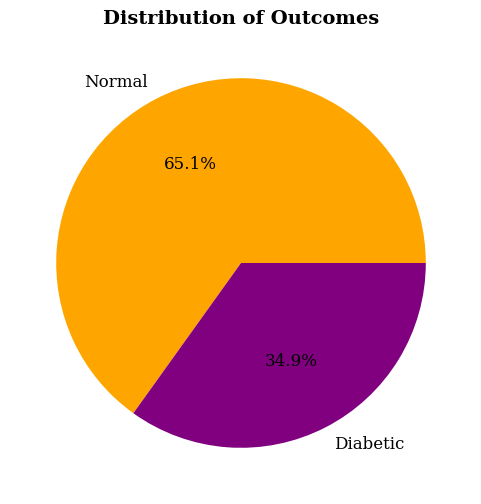

In [53]:
#colors = ['#da8886', '#aa8987']
colors = ['#ffA500', '#800080']

label_mapping = {0: 'Normal', 1: 'Diabetic'}
df['Outcome'] = df['Outcome'].map(label_mapping)

# Define custom colors for normal and diabetic outcomes

plt.rcParams['font.family'] = 'serif'

# Plotting a pie chart
plt.figure(figsize=(6, 6))
plt.pie(df['Outcome'].value_counts(), labels=df['Outcome'].value_counts().index, autopct='%1.1f%%', colors=colors, textprops={'fontsize': 12})
plt.title('Distribution of Outcomes', fontsize=14, fontweight='bold')
plt.show()

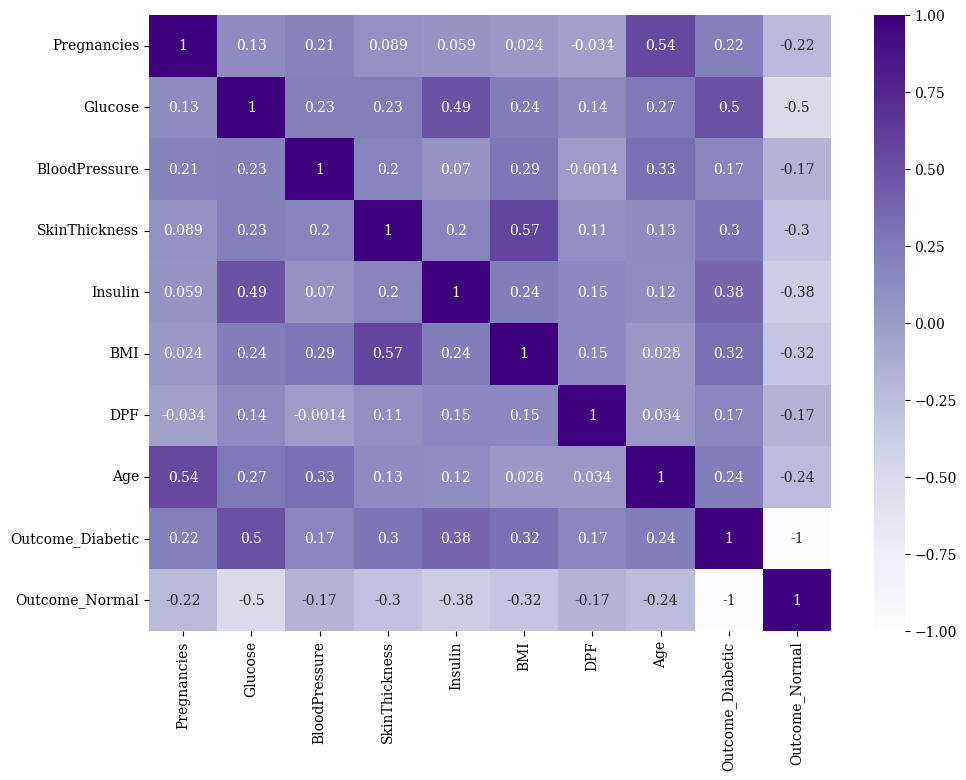

In [54]:
#Glucose affect the outcomes the most with 47%
#then the BMI with 29%
fs = pd.get_dummies(df, dtype=float)
corrmat = fs.corr()

plt.figure(figsize=(11, 8))  #

# Define the colormap
cmap = sns.diverging_palette(70, 20, s=50, l=40, n=6, as_cmap=True)
sns.heatmap(corrmat, annot=True, cmap='Purples')

plt.show()

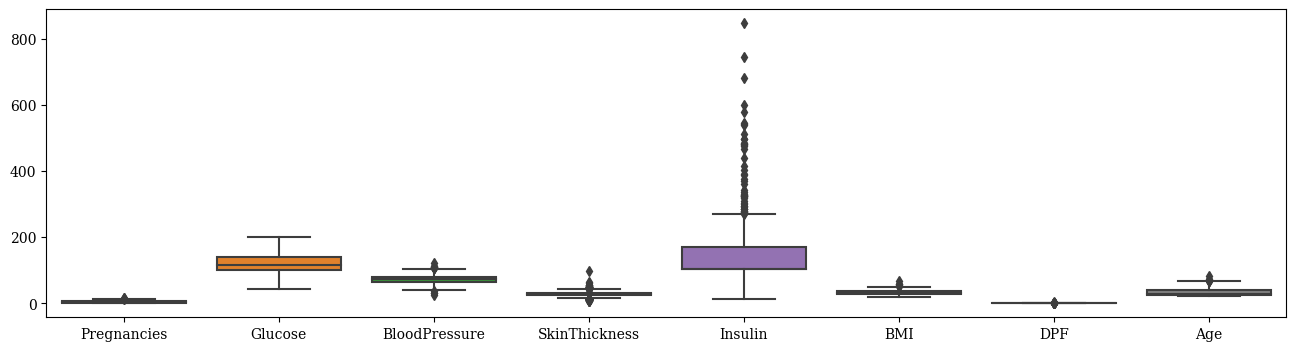

In [55]:
# Boxplot - checking for outliers

plt.figure(figsize=[16,4])
sns.boxplot(data=df)
plt.show()

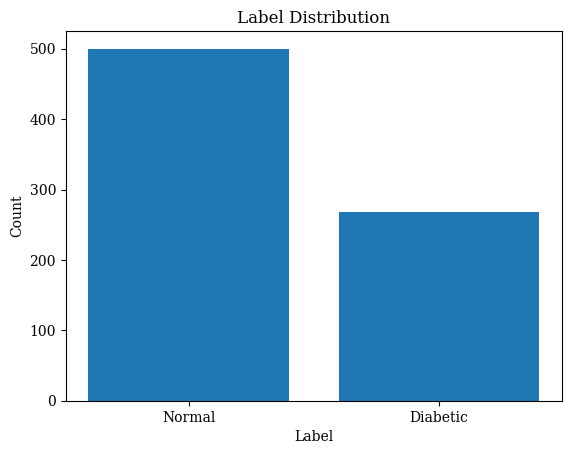

In [56]:
#Imbalance
label_counts = df['Outcome'].value_counts()
plt.bar(label_counts.index, label_counts.values)
plt.xlabel('Label')
plt.ylabel('Count')
plt.title('Label Distribution')
plt.show()

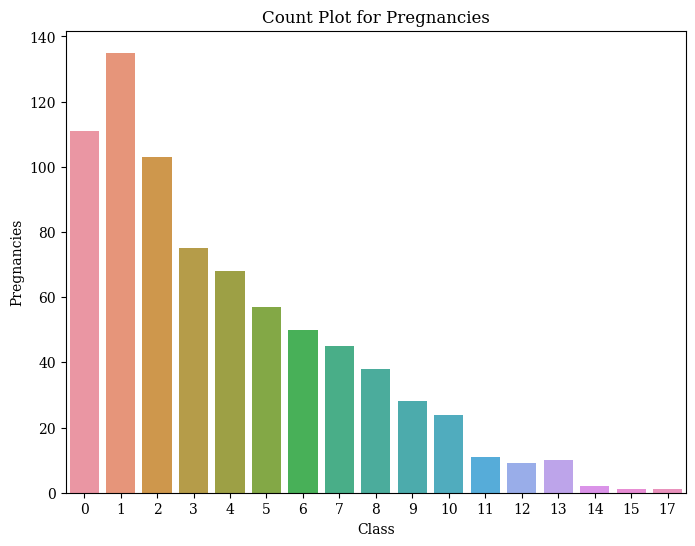

In [57]:
plt.figure(figsize=(8, 6))
sns.countplot(x='Pregnancies', data=df)
plt.xlabel('Class')
plt.ylabel('Pregnancies')
plt.title('Count Plot for Pregnancies')
plt.show()

In [58]:
df['Outcome'].replace({'Normal': 0, 'Diabetic': 1}, inplace=True)
df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DPF,Age,Outcome
0,6,148.0,72.0,35.0,169.5,33.6,0.627,50,1
1,1,85.0,66.0,29.0,102.5,26.6,0.351,31,0
2,8,183.0,64.0,32.0,169.5,23.3,0.672,32,1
3,1,89.0,66.0,23.0,94.0,28.1,0.167,21,0
4,0,137.0,40.0,35.0,168.0,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101.0,76.0,48.0,180.0,32.9,0.171,63,0
764,2,122.0,70.0,27.0,102.5,36.8,0.340,27,0
765,5,121.0,72.0,23.0,112.0,26.2,0.245,30,0
766,1,126.0,60.0,32.0,169.5,30.1,0.349,47,1


In [59]:
df_temp = df.copy()
df_temp['Outcome'] = df_temp['Outcome'].map({0: 'healthy', 1: 'diabetic'})

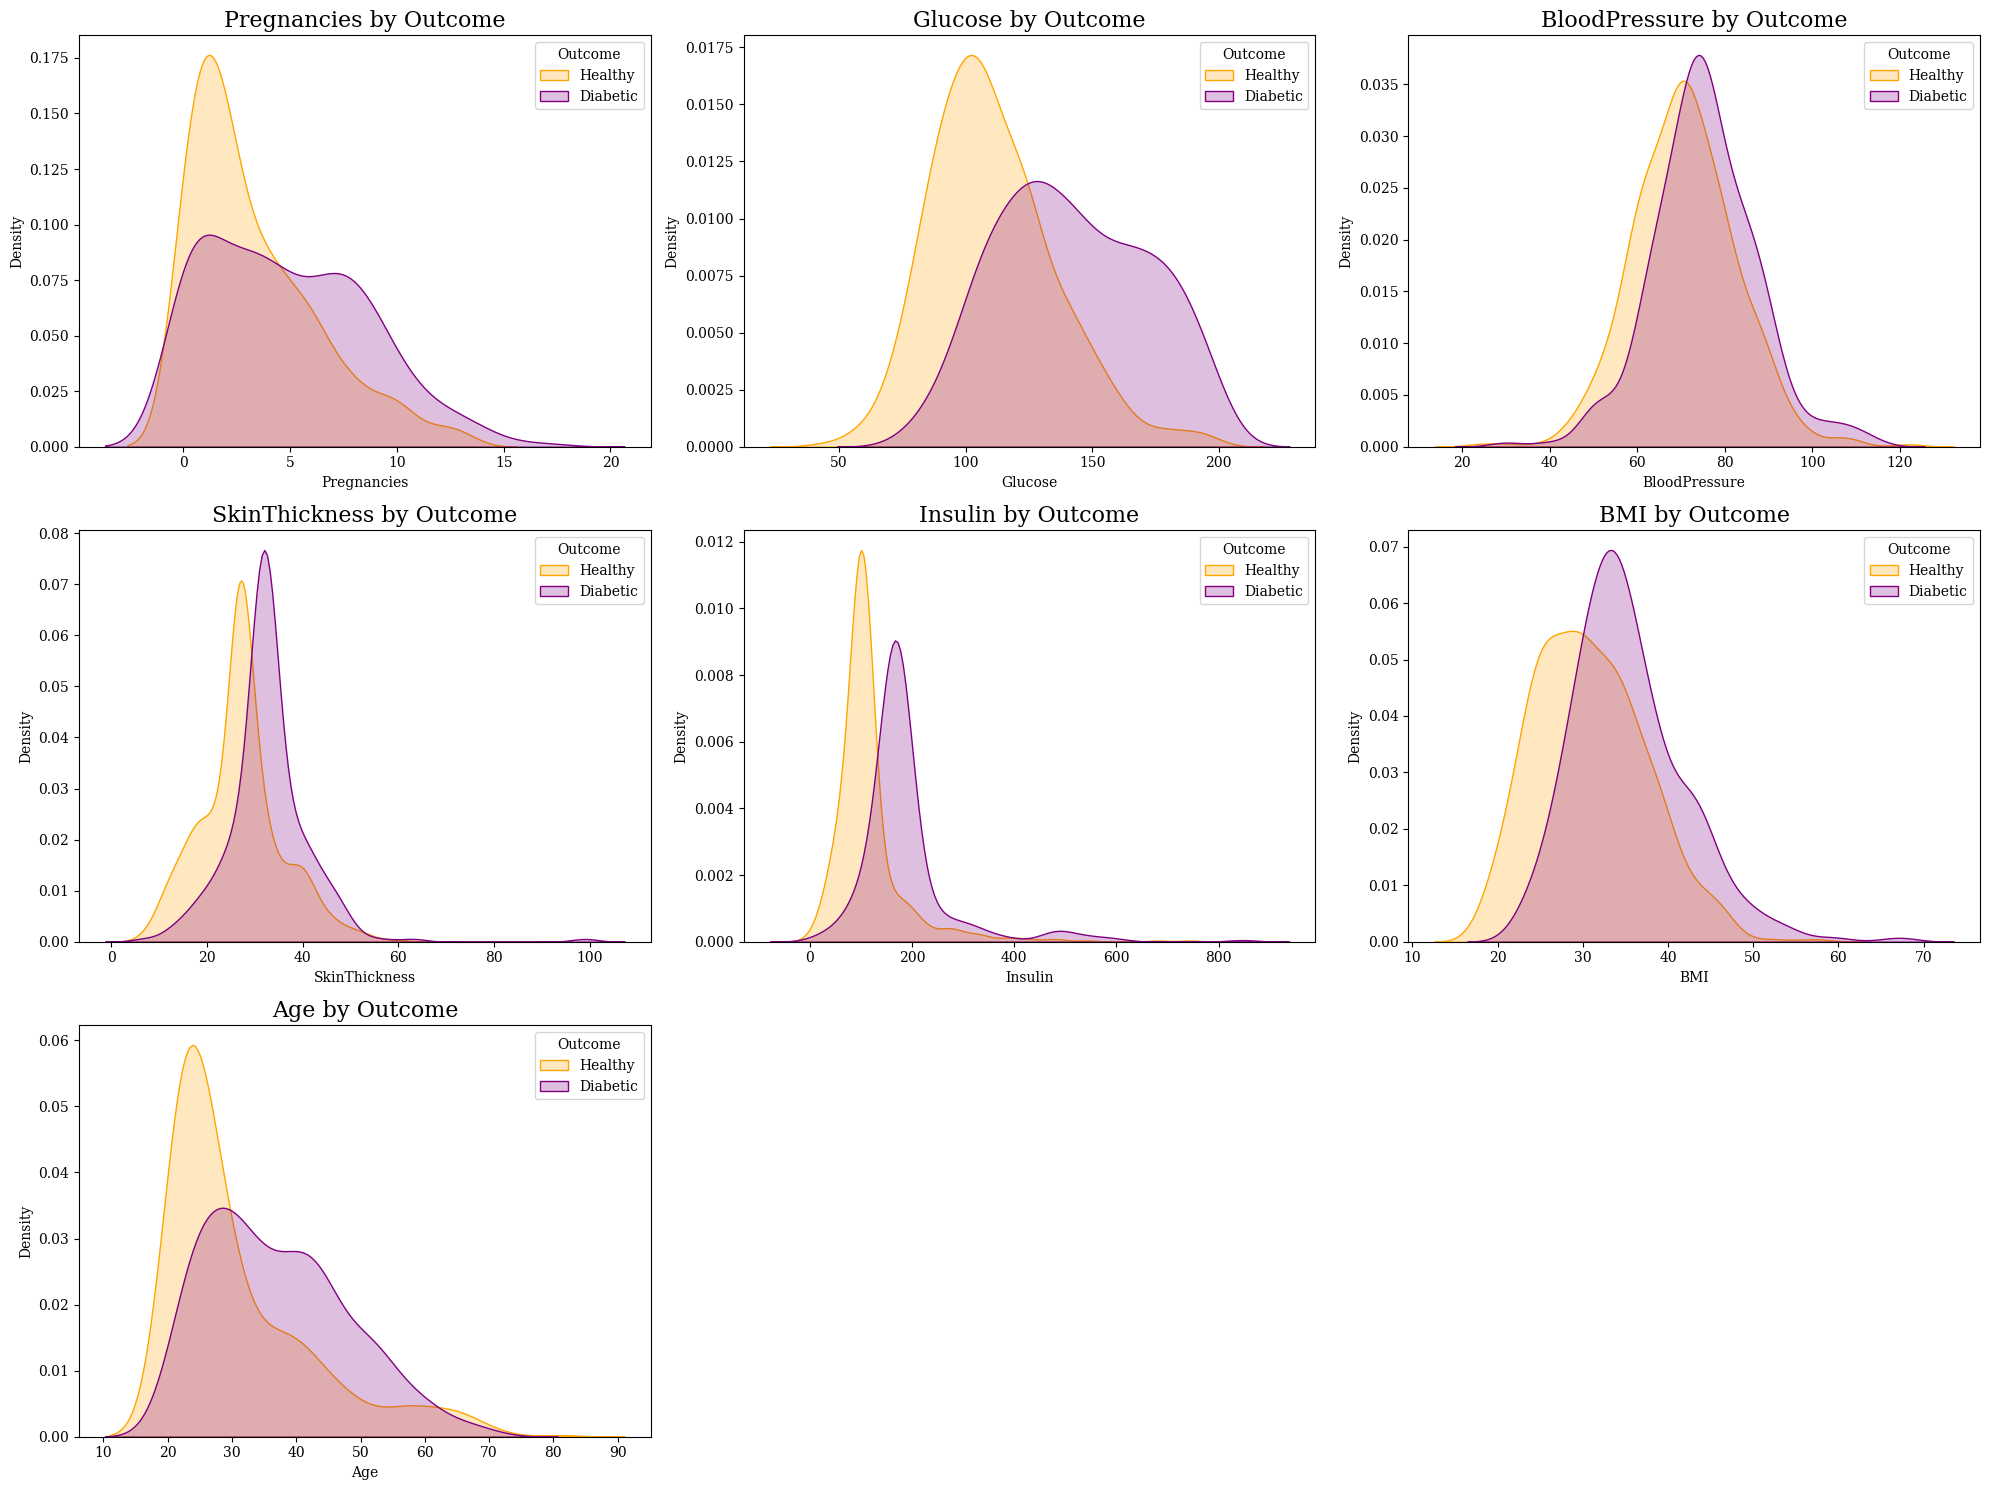

In [60]:
plt.figure(figsize=(20, 15))
variables = ['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'Age']

for i, var in enumerate(variables, 1):
    plt.subplot(3, 3, i)
    sns.kdeplot(data=df_temp, x=var, hue='Outcome', fill=True, common_norm=False, palette={'healthy': 'orange', 'diabetic': 'purple'})
    plt.title(f'{var} by Outcome',fontsize=16)
    plt.xlabel(var)
    plt.ylabel('Density')
    plt.legend(title='Outcome', labels=['Healthy', 'Diabetic'])

plt.tight_layout()
plt.show()



<Figure size 1000x200 with 0 Axes>

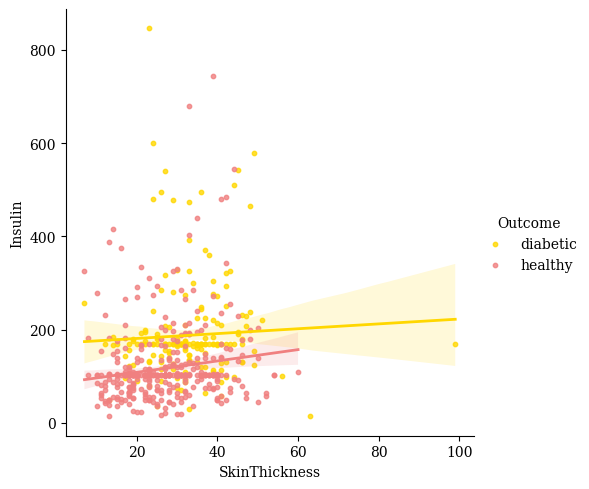

In [61]:
plt.figure(figsize=(10,2))
sns.lmplot(x='SkinThickness', y='Insulin', data=df_temp, hue='Outcome', scatter_kws={'s': 10}, line_kws={'linewidth': 2}, palette={'healthy': 'lightcoral', 'diabetic': 'gold'})
plt.show()